<font size="+3" color=Blue><b> <center><u>Image Classification on any custom dataset</u></center></b></font>

![](https://miro.medium.com/max/700/1*oB3S5yHHhvougJkPXuc8og.gif)

<a id="24"></a>
<font color="blue" size=+2.5><b> Other Best Work </b></font>
1. [Learn Plotly ](http://www.kaggle.com/arbazkhan971/iris-eda-plotly-25-models-for-beginners)
2. [Learn Fast ai as a beginner ](https://www.kaggle.com/arbazkhan971/pneumonia-detection-using-cnn-96-accuracy)
3. [Learn NLP](https://www.kaggle.com/arbazkhan971/sentiment-analysis-for-beginner-93-accuracy)
4. [Learn Sentiment Analysis As a Beginner](https://www.kaggle.com/arbazkhan971/tweets-classification-82-eda-cleaning-fastai)
5. [Cancer Detection Using CNN](https://www.kaggle.com/arbazkhan971/invasive-ductal-carcinoma-classification-89-acc)
6. [Image classification Using CNN ](https://www.kaggle.com/arbazkhan971/image-classifications-in-5-steps-for-beginner)
7. [Machine Learning For beginner ](https://www.kaggle.com/arbazkhan971/titanic-survival-everything-that-you-need-to-know)
8. [Loan Analysis Using Seaborn for beginner](https://www.kaggle.com/arbazkhan971/loan-approval-analysis-eda-for-begineers)[Kaggle Survey Data Analysis](https://www.kaggle.com/arbazkhan971/indians-vs-world)
9. [Retina Damage Classification for Noobs ](https://www.kaggle.com/arbazkhan971/retina-damage-classification-95-accuracy)
10. [Machine Learning Algorithms For Beginners](https://www.kaggle.com/arbazkhan971/pima-eda-plotly-25-models-for-beginners)
11. [Analysis Of Rapes In india](https://www.kaggle.com/arbazkhan971/analysis-of-rapes-in-india)

# Objective

The aim of this kernel is to provide all the tips and tricks required to train image classification model on any given image dataset in a single page.This kernel will hold almost all steps and steps required to implement image classification algorithm using SOTA such as ResNET on any given dataset.It could be a great time saver for you.Just utilize it anytime when you are working on Image Classification.

I have learned them from [FastAI](https://docs.fast.ai/)

<font size="+1" color=red ><b>Please Upvote my kernel and keep it in your favourite section if you think it is helpful.</b></font>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of content</h3>

<font color="blue" size=+1><b>Introduction</b></font>
* [1. What is Deep Learning ?](#1)
* [2. What is CNN ?](#2)

<font color="blue" size=+1><b>Library</b></font>
* [1. Installation](#3)
* [2. Import Libraries ](#4)
    
<font color="blue" size=+1><b> Load and view your data </b></font>
* [1. Setting up path for training data ](#5)
* [2. Data Loading For training ](#6)
* [3. Data Explorations ](#7)
* [4. Print Classes present in the data ](#8)

<font color="blue" size=+1><b> Create and train a model </b></font>
* [1. Create Models ](#9)
* [2. Train Model ](#11)
* [3. Finding LR ](#10)
* [4. Finetuning HyperParameter](#12)

<font color="blue" size=+1><b> Others </b></font>
* [1. Interpret the results](#13)
* [2. Prediction Using Trained Model](#14)
* [3. Save and Load Model](#15)
* [4. Sources](#16)

<a id="1"></a>
<font color="blue" size=+2.5><b>1.1  What is Deep Learning ?</b></font>
<br/>
<br/>
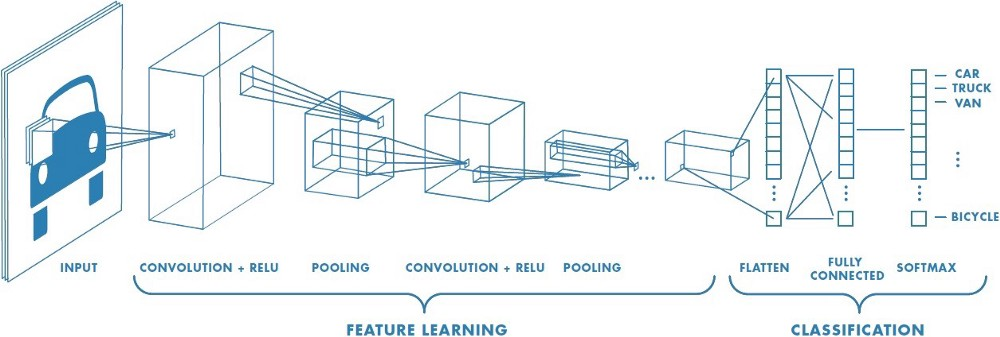
<br/>
<br/>

*Deep learning is a subset of machine learning concerned with the emulation of human brain activities in software programs using layers of artificial neural networks (ANN), which work similar to the human brain at some levels.*

<a id="2"></a>
<font color="blue" size=+2.5><b>1.2 What is CNN ?</b></font>
<br/>
<br/>
CNN stands for Convolutional Neural Network which is a specialized neural network for processing data that has an input shape like a 2D matrix like images. CNN's are typically used for image detection and classification.

<a id="3"></a>
<font color="blue" size=+2.5><b>2.1 Installation of Libraries </b></font>

## !pip install fastai

<a id="4"></a>
<font color="blue" size=+2.5><b>2.2 Library Import</b></font>

In [1]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

<a id="5"></a>
<font color="blue" size=+2.5><b>3.1 Setting up path for training data</b></font>

**Point to be Noted: Number of elements in a list of path is same as number of classes you have**

In [2]:
x  = '/kaggle/input/intel-image-classification/seg_train/seg_train'
path = Path(x)
path.ls()

[PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/mountain'),
 PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/street'),
 PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/buildings'),
 PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/sea'),
 PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/forest'),
 PosixPath('/kaggle/input/intel-image-classification/seg_train/seg_train/glacier')]

<a id="6"></a>
<font color="blue" size=+2.5><b>3.2 Data Loading For training</b></font>
<br/>

**Things to be remember:**
* Decide validation percentage ( 0.2 => 20% )
* Provide path for training data
* [Decide augmentations criteria (optional)](https://www.kaggle.com/init27/introduction-to-image-augmentation-using-fastai/)
* Decide image size (which is 224 in my case)
* Test data can also be added but it's optional

In [3]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

<a id="7"></a>
<font color="blue" size=+2.5><b>3.3 Data Explorations</b></font>
<br/>

*Our image dataset is stored as .jpg files in 2 different folders, with each folder bearing the name of model of the images contained in the folder. We use the ImageDataBunch.from_folder() function to load the images and assign labels the images based on the name of the folder they’re read from.*

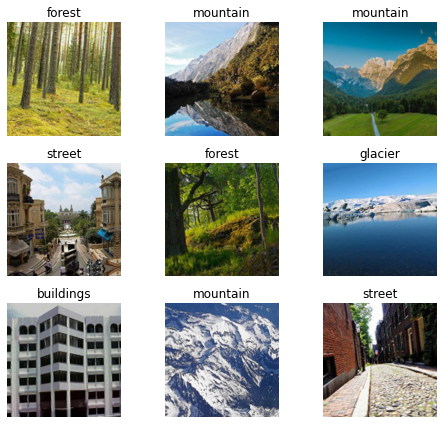

In [4]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)

<a id="8"></a>
<font color="blue" size=+2.5><b>3.4 Print Classes present in the data</b></font>
<br/>

* data.c — How many classes are there in our dataset?
* len(data.train_ds) — What is the size of our training dataset?
* len(data.valid_ds) — What is the size of our validation dataset?

In [5]:
data

ImageDataBunch;

Train: LabelList (11228 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
mountain,mountain,mountain,mountain,mountain
Path: /kaggle/input/intel-image-classification/seg_train/seg_train;

Valid: LabelList (2806 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sea,mountain,mountain,mountain,mountain
Path: /kaggle/input/intel-image-classification/seg_train/seg_train;

Test: None

In [6]:
print(data.classes)
len(data.classes)
data.c

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


6

<a id="9"></a>
<font color="blue" size=+2.5><b>4.1 Create Model</b></font>
<br/>
* We now use a pre-trained ResNet18 Convolutional Neural Net model, and use transfer learning to learn weights of only the last layer of the network.
* Why Transfer learning? Because with transfer learning, you begin with an existing (trained) neural network used for image recognition — and then tweak it a bit (or more) here and there to train a model for your particular use case. And why do we do that? Training a reasonable neural network would mean needing approximately 300,000 image samples, and to achieve really good performance, we’re going to need at least a million images.
* In our case, we have approximately 2500 images in our training set — you have one guess to decide if that would have been enough if were to train a neural net from scratch.
* We use the create_cnn() function for loading a pre-trained ResNet18 network, that was trained on around a million images from the ImageNet database.

In [7]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


<a id="10"></a>
<font color="blue" size=+2.5><b>4.2 Finding LR</b></font>
<br/>

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


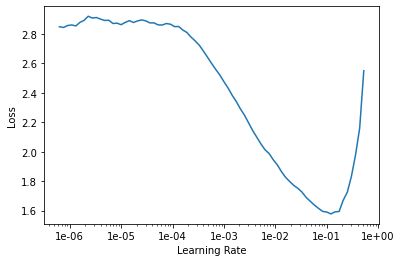

In [8]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

<a id="11"></a>
<font color="blue" size=+2.5><b>4.3 Train Model</b></font>
<br/>

In [9]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(40,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.405578,0.290146,0.901283,01:33
1,0.383602,0.299907,0.902708,01:29
2,0.336319,0.306456,0.911974,01:29
3,0.343718,0.326254,0.892374,01:30
4,0.364961,0.304092,0.906985,01:29
5,0.515605,0.546500,0.875624,01:30
6,0.622033,0.581009,0.892730,01:30
7,0.681928,0.578457,0.893443,01:30
8,1.094560,1.054756,0.897006,01:29
9,0.889135,1.874039,0.889522,01:30


<a id="12"></a>
<font color="blue" size=+2.5><b>4.4 Hyper Parameter Tuning</b></font>


In [10]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))


epoch,train_loss,valid_loss,accuracy,time
0,0.159835,0.224613,0.935495,01:29
1,0.180235,0.768976,0.919815,01:30
2,0.219724,0.273913,0.918746,01:31
3,0.214327,0.249109,0.926230,01:30
4,0.225790,1.400049,0.875267,01:31
5,0.208292,0.335781,0.908054,01:31
6,0.204567,0.318150,0.900570,01:31
7,0.182223,0.239845,0.919458,01:30
8,0.174720,0.263758,0.914469,01:31
9,0.139013,0.239959,0.928368,01:31


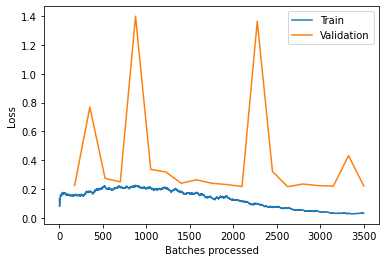

In [11]:
learn.recorder.plot_losses()

# <a id="13"></a>
<font color="blue" size=+2.5><b>5.1 Interpret the results</b></font>

Model performance can be validated in different ways. One of the popular methods is using the confusion matrix. Diagonal values of the matrix indicate correct predictions for each class, whereas other cell values indicate a number of wrong predictions.

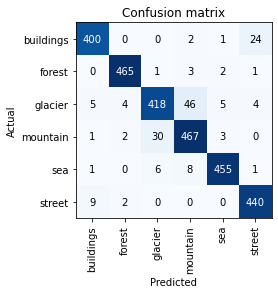

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

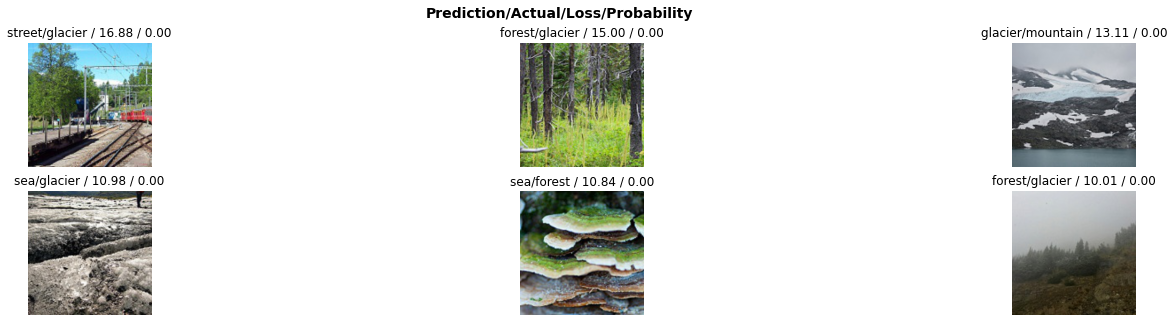

In [13]:
interp.plot_top_losses(6,figsize = (25,5))

<a id="14"></a>
<font color="blue" size=+2.5><b>5.2 Prediction Using Trained Model</b></font>

In [14]:
img = open_image('/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/21982.jpg')
print(learn.predict(img)[0])

glacier


<a id="15"></a>
<font color="blue" size=+2.5><b>5.3 Save and Load Model</b></font>

In [15]:
img = open_image('/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/21982.jpg')
print(learn.predict(img)[0])

glacier


In [16]:
learn.export(file = Path("/kaggle/working/export.pkl"))
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

PosixPath('/kaggle/working/stage-1.pth')

<a id="16"></a>
<font color="blue" size=+2.5><b>5.4 Sources</b></font>
* [Fastai MOOC](https://course.fast.ai/)
* [Fastai library](https://docs.fast.ai/)

### If these kernels impress you,give them an <font size="+3" color="red"><b>Upvote</b></font>.<br>

<a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOP</a>